# Importing Libraries

In [8]:
import pandas as pd
import numpy as np

import pickle
import os

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

from matplotlib import pyplot as plt

# Loading Dataset

In [2]:
ALL_DATA_FILE = "F:\\usl\\all_object_data_in_dictionary_format.pkl"
with open("F:\\usl\\all_object_data_in_dictionary_format.pkl", 'rb') as f:
    data = pickle.load(f)

In [3]:
y=data['targets']
X=data['images']

In [4]:
X.shape

(894408, 3, 51, 51)

In [5]:
y.shape

(894408,)

# Data Visualization

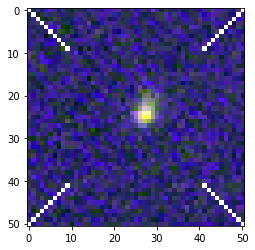

In [24]:
plt.imshow(np.transpose(X[25], (1, 2, 0)))
plt.show()

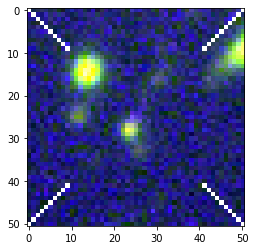

In [25]:
plt.imshow(np.transpose(X[10], (1, 2, 0)))
plt.show()

# Applying One hot encoding

In [7]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray()

C:\Users\chait\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


# Splitting Data into Training, Testing and Validation sets

In [8]:
from sklearn.model_selection import train_test_split

In [9]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)



X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)



# Importing Libraries of Keras and Tensorflow for deep Learning

In [10]:
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

import keras
from keras.layers.core import Layer
import keras.backend as K

from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Input, concatenate,GlobalAveragePooling2D, AveragePooling2D,Flatten
from keras.models import Model
from keras.layers.merge import concatenate


Using TensorFlow backend.


In [11]:
import tensorflow as tf
import keras.backend.tensorflow_backend as tfback
from tensorflow.keras.models import load_model

In [12]:
print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)

tf.__version__ is 2.1.0
tf.keras.__version__ is: 2.2.4-tf


In [13]:
def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

# Setting Optimizer as RMSprop

# and loss as binary-crossentropy

In [14]:
from keras.optimizers import RMSprop
from keras import callbacks
optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'

# Model-1:  Basic CNN Architecture 

In [15]:
def supernova_CNN():
    
    model = Sequential()

    model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(3, 51, 51), activation='relu'))
    model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))

    model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
    
    model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
    
    model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))



    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(2))
    model.add(Activation('sigmoid'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model


In [16]:
model = supernova_CNN()

C:\Users\chait\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(3, 51, 51..., activation="relu", padding="same")`
  """
C:\Users\chait\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  
C:\Users\chait\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  import sys
C:\Users\chait\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  if __name__ == '__main__':
C:\Users\chait\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="s

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 3, 51, 32)         14720     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 51, 32)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 25, 16)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 25, 64)         9280      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 25, 64)         36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 12, 32)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 12, 128)       

# Using earlystopping as call back to avoid overfitting

In [18]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)
history=model.fit(X_train, y_train, batch_size=256, epochs=30, validation_data=(X_val, y_val), callbacks=[earlystopping])

Train on 646209 samples, validate on 114037 samples
Epoch 1/30
646209/646209 [==============================] - 168s 260us/step - loss: 0.1896 - accuracy: 0.9282 - val_loss: 0.1425 - val_accuracy: 0.9481
Epoch 2/30
646209/646209 [==============================] - 145s 225us/step - loss: 0.1390 - accuracy: 0.9499 - val_loss: 0.1353 - val_accuracy: 0.9521
Epoch 3/30
646209/646209 [==============================] - 89s 138us/step - loss: 0.1310 - accuracy: 0.9536 - val_loss: 0.1553 - val_accuracy: 0.9468
Epoch 4/30
646209/646209 [==============================] - 91s 140us/step - loss: 0.1273 - accuracy: 0.9561 - val_loss: 0.1417 - val_accuracy: 0.9456
Epoch 5/30
646209/646209 [==============================] - 94s 145us/step - loss: 0.1320 - accuracy: 0.9576 - val_loss: 0.1266 - val_accuracy: 0.9545
Epoch 6/30
646209/646209 [==============================] - 95s 146us/step - loss: 0.1258 - accuracy: 0.9589 - val_loss: 0.1215 - val_accuracy: 0.9564
Epoch 7/30
646209/646209 [==============

# Accuracy and Loss graph on Training and Validation set

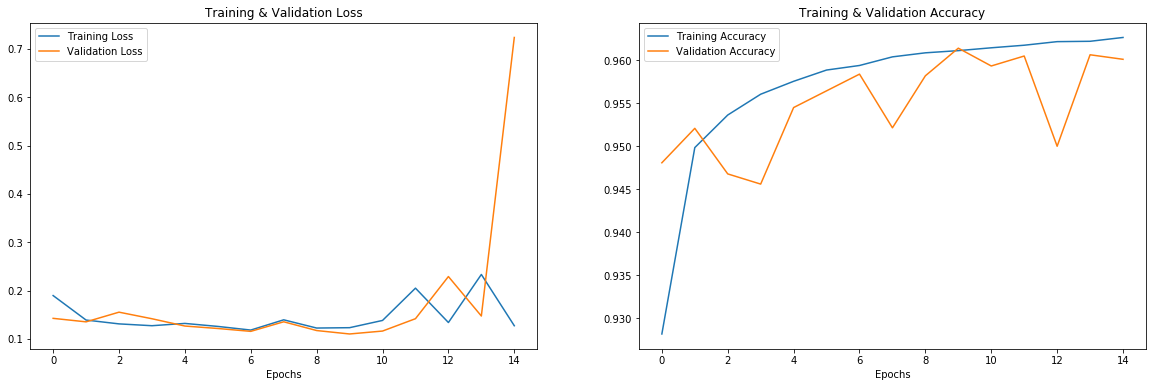

In [22]:


epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , val_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , val_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

# Accuracy on training data

In [23]:
print("Accuracy of our model on training data : ")
model.evaluate(X_train,y_train)[1]*100

Accuracy of our model on training data : 
646209/646209 [==============================] - 72s 112us/step


96.38901948928833

# Accuracy on test data

In [24]:
print("Accuracy of our model on test data : ")
model.evaluate(X_test,y_test)[1]*100

Accuracy of our model on test data : 
134162/134162 [==============================] - 16s 117us/step


96.06669545173645

In [25]:
pred_test = model.predict(X_test)
actual_test = y_test

In [26]:
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [27]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,1.0,1.0


In [28]:
df = df.replace([1],'Supernova')
df = df.replace([0],'Non-Supernova')
df

,Predicted Labels,Actual Labels
0,Non-Supernova,Non-Supernova
1,Supernova,Supernova
2,Non-Supernova,Non-Supernova
3,Non-Supernova,Supernova
4,Non-Supernova,Non-Supernova
...,...,...
134157,Supernova,Supernova
134158,Non-Supernova,Non-Supernova
134159,Non-Supernova,Non-Supernova
134160,Non-Supernova,Non-Supernova


# Plotting Confusion Matrix

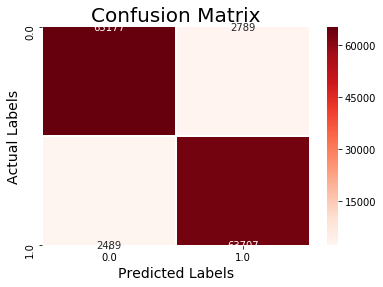

In [29]:
cm = confusion_matrix(y_test, y_pred)

cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Reds', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

# Classification Report

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     67966
         1.0       0.96      0.96      0.96     66196

    accuracy                           0.96    134162
   macro avg       0.96      0.96      0.96    134162
weighted avg       0.96      0.96      0.96    134162



# Results

The accuracy of our model on training dataset is 96.38 and on testing dataset is 96.06. Precision Recall and F1 score can be infered by classification report.

---------------------------------------------------------------------------------------------------------------------------

# Model-2: AlexNet

In [18]:
AlexNet = Sequential()

AlexNet.add(Conv2D(filters=96, input_shape=(3,51,51), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

AlexNet.add(Flatten())

AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Dropout(0.4))

AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Dropout(0.4))

AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Dropout(0.4))

AlexNet.add(Dense(2))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('sigmoid'))

AlexNet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 1, 13, 96)         592512    
_________________________________________________________________
batch_normalization_19 (Batc (None, 1, 13, 96)         384       
_________________________________________________________________
activation_19 (Activation)   (None, 1, 13, 96)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 7, 96)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 7, 256)         614656    
_________________________________________________________________
batch_normalization_20 (Batc (None, 1, 7, 256)         1024      
_________________________________________________________________
activation_20 (Activation)   (None, 1, 7, 256)        

In [19]:
AlexNet.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])

# Using earlystopping as call back to avoid overfitting

In [22]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)
history=AlexNet.fit(X_train, y_train, batch_size=256, epochs=30, validation_data=(X_val, y_val), callbacks=[earlystopping])

Train on 646209 samples, validate on 114037 samples
Epoch 1/30
646209/646209 [==============================] - 285s 441us/step - loss: 0.3335 - accuracy: 0.9420 - val_loss: 0.2967 - val_accuracy: 0.9559
Epoch 2/30
646209/646209 [==============================] - 218s 337us/step - loss: 0.2699 - accuracy: 0.9598 - val_loss: 0.2525 - val_accuracy: 0.9603
Epoch 3/30
646209/646209 [==============================] - 222s 344us/step - loss: 0.2254 - accuracy: 0.9647 - val_loss: 0.2378 - val_accuracy: 0.9439
Epoch 4/30
646209/646209 [==============================] - 224s 346us/step - loss: 0.1898 - accuracy: 0.9681 - val_loss: 0.1975 - val_accuracy: 0.9548
Epoch 5/30
646209/646209 [==============================] - 224s 347us/step - loss: 0.1611 - accuracy: 0.9709 - val_loss: 0.1709 - val_accuracy: 0.9585
Epoch 6/30
646209/646209 [==============================] - 224s 346us/step - loss: 0.1382 - accuracy: 0.9731 - val_loss: 0.1445 - val_accuracy: 0.9652
Epoch 7/30
646209/646209 [==========

# Accuracy and Loss graph on Training and Validation set

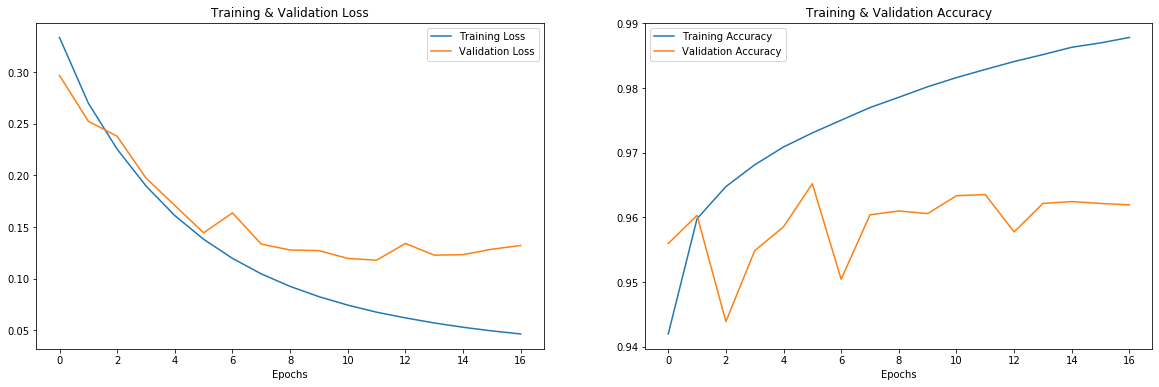

In [23]:
epochs = [i for i in range(17)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , val_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , val_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

# Accuracy on training data

In [25]:
print("Accuracy of our model on training data : ")
AlexNet.evaluate(X_train,y_train)[1]*100

Accuracy of our model on training data : 
646209/646209 [==============================] - 140s 216us/step


98.49158525466919

# Accuracy on test data

In [26]:
print("Accuracy of our model on test data : ")
AlexNet.evaluate(X_test,y_test)[1]*100

Accuracy of our model on test data : 
134162/134162 [==============================] - 29s 219us/step


96.39093279838562

In [28]:
from keras.models import load_model
from keras.models import model_from_json
model_json = AlexNet.to_json()
with open("Alexnet.json", "w") as json_file:
    json_file.write(model_json)

In [30]:
AlexNet.save_weights("Alexnet.h5")

In [32]:
pred_test = AlexNet.predict(X_test)
actual_test = y_test

In [33]:
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [34]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,1.0,1.0


In [35]:
df = df.replace([1],'Supernova')

In [36]:
df = df.replace([0],'Non-Supernova')

In [37]:
df

,Predicted Labels,Actual Labels
0,Non-Supernova,Non-Supernova
1,Supernova,Supernova
2,Non-Supernova,Non-Supernova
3,Non-Supernova,Supernova
4,Non-Supernova,Non-Supernova
...,...,...
134157,Supernova,Supernova
134158,Non-Supernova,Non-Supernova
134159,Non-Supernova,Non-Supernova
134160,Non-Supernova,Non-Supernova


# Plotting Confusion Matrix

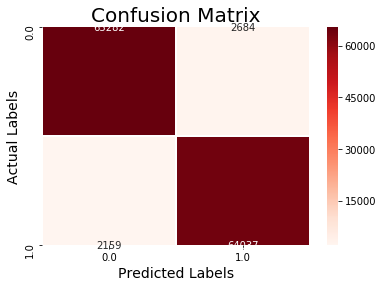

In [39]:
cm = confusion_matrix(y_test, y_pred)

cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Reds', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

# Classification Report

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96     67966
         1.0       0.96      0.97      0.96     66196

    accuracy                           0.96    134162
   macro avg       0.96      0.96      0.96    134162
weighted avg       0.96      0.96      0.96    134162



# Results

The accuracy of our model on training dataset is 98.49% and on testing dataset is 96.39%. Precision Recall and F1 score can be infered by classification report.

---------------------------------------------------------------------------------------------------------------------------

# Model-3: GoogLe Net

In [17]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

# Defining Inception Block with 1x1, 3x3 and 5x5 filter

In [18]:
def inception_module(x,filters_1x1,filters_3x3_reduce,filters_3x3,filters_5x5_reduce,
                     filters_5x5,filters_pool_proj,name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu',
                      kernel_initializer=kernel_init,bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu',
                      kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu',
                      kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu',
                      kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu',
                      kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu',
                       kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output

In [19]:
input_layer = Input(shape=(3, 51, 51))

x = Conv2D(64, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(1, 1), name='max_pool_1_3x3/2')(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = MaxPool2D((3, 3), padding='same', strides=(1, 1), name='max_pool_2_3x3/2')(x)

x = inception_module(x,filters_1x1=64,filters_3x3_reduce=96,filters_3x3=128,filters_5x5_reduce=16,filters_5x5=32,
                     filters_pool_proj=32,name='inception_3a')

x = inception_module(x,filters_1x1=128,filters_3x3_reduce=128,filters_3x3=192,filters_5x5_reduce=32,filters_5x5=96,
                     filters_pool_proj=64,name='inception_3b')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,filters_1x1=192,filters_3x3_reduce=96,filters_3x3=208,filters_5x5_reduce=16,filters_5x5=48,
                     filters_pool_proj=64,name='inception_4a')

x1 = AveragePooling2D((2, 2), strides=3)(x)
x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
x1 = Flatten()(x1)
x1 = Dense(1024, activation='relu')(x1)
x1 = Dropout(0.4)(x1)
x1 = Dense(2, activation='sigmoid', name='auxilliary_output_1')(x1)

x = inception_module(x,filters_1x1=160,filters_3x3_reduce=112,filters_3x3=224,filters_5x5_reduce=24,filters_5x5=64,
                     filters_pool_proj=64,name='inception_4b')

x = inception_module(x,filters_1x1=128,filters_3x3_reduce=128,filters_3x3=256,filters_5x5_reduce=24,filters_5x5=64,
                     filters_pool_proj=64,name='inception_4c')

x = inception_module(x,filters_1x1=112,filters_3x3_reduce=144,filters_3x3=288,filters_5x5_reduce=32,filters_5x5=64,
                     filters_pool_proj=64,name='inception_4d')


x2 = AveragePooling2D((2, 2), strides=3)(x)
x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)
x2 = Flatten()(x2)
x2 = Dense(1024, activation='relu')(x2)
x2 = Dropout(0.4)(x2)
x2 = Dense(2, activation='sigmoid', name='auxilliary_output_2')(x2)

x = inception_module(x,filters_1x1=256,filters_3x3_reduce=160,filters_3x3=320,filters_5x5_reduce=32,filters_5x5=128,
                     filters_pool_proj=128,name='inception_4e')

x = MaxPool2D((2, 2), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

x = inception_module(x,filters_1x1=256,filters_3x3_reduce=160,filters_3x3=320,filters_5x5_reduce=32,
                     filters_5x5=128,filters_pool_proj=128,name='inception_5a')

x = inception_module(x,filters_1x1=384,filters_3x3_reduce=192,filters_3x3=384,filters_5x5_reduce=48,filters_5x5=128,
                     filters_pool_proj=128,name='inception_5b')

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)
x = Dropout(0.4)(x)
x = Dense(2, activation='sigmoid', name='output')(x)

In [20]:
model = Model(input_layer, [x, x1, x2], name='inception_v1')

In [21]:
model.summary()

Model: "inception_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 3, 51, 51)    0                                            
__________________________________________________________________________________________________
conv_1_7x7/2 (Conv2D)           (None, 3, 51, 64)    29440       input_2[0][0]                    
__________________________________________________________________________________________________
max_pool_1_3x3/2 (MaxPooling2D) (None, 3, 51, 64)    0           conv_1_7x7/2[0][0]               
__________________________________________________________________________________________________
conv_2a_3x3/1 (Conv2D)          (None, 3, 51, 64)    4160        max_pool_1_3x3/2[0][0]           
_______________________________________________________________________________________

In [22]:
model.compile(loss=[objective,objective,objective], optimizer=optimizer, metrics=['accuracy'])

# Using earlystopping as call back to avoid overfitting

In [23]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)
history=model.fit(X_train,[y_train,y_train,y_train], batch_size=256, epochs=30, validation_data=(X_val, [y_val,y_val,y_val]), callbacks=[earlystopping])

Train on 646209 samples, validate on 114037 samples
Epoch 1/30
646209/646209 [==============================] - 1073s 2ms/step - loss: 0.5981 - output_loss: 0.2144 - auxilliary_output_1_loss: 0.1951 - auxilliary_output_2_loss: 0.1885 - output_accuracy: 0.9164 - auxilliary_output_1_accuracy: 0.9287 - auxilliary_output_2_accuracy: 0.9283 - val_loss: 0.4856 - val_output_loss: 0.1640 - val_auxilliary_output_1_loss: 0.1629 - val_auxilliary_output_2_loss: 0.1589 - val_output_accuracy: 0.9382 - val_auxilliary_output_1_accuracy: 0.9398 - val_auxilliary_output_2_accuracy: 0.9408
Epoch 2/30
646209/646209 [==============================] - 994s 2ms/step - loss: 0.4109 - output_loss: 0.1401 - auxilliary_output_1_loss: 0.1356 - auxilliary_output_2_loss: 0.1353 - output_accuracy: 0.9487 - auxilliary_output_1_accuracy: 0.9508 - auxilliary_output_2_accuracy: 0.9509 - val_loss: 0.4681 - val_output_loss: 0.1660 - val_auxilliary_output_1_loss: 0.1452 - val_auxilliary_output_2_loss: 0.1571 - val_output_ac

# Saving Model Weights for future use 

In [24]:
from keras.models import load_model
from keras.models import model_from_json
model_json = model.to_json()
with open("googlenet.json", "w") as json_file:
    json_file.write(model_json)

In [25]:
model.save_weights("model_LSTM.h5")

# Accuracy and Loss graph on Training and Validation set

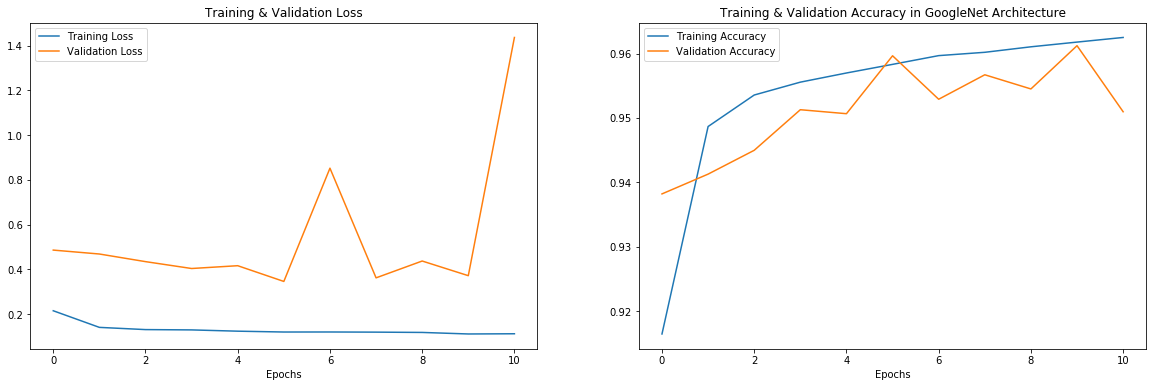

In [27]:

epochs = [i for i in range(11)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['output_accuracy']
train_loss = history.history['output_loss']
val_acc = history.history['val_output_accuracy']
val_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , val_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , val_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy in GoogleNet Architecture')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

# Accuracy on training data

In [28]:
print("Accuracy of our model on training data : ")
model.evaluate(X_train,[y_train,y_train,y_train])[4]*100

Accuracy of our model on training data : 
646209/646209 [==============================] - 390s 604us/step


96.15983366966248

# Accuracy on test data

In [29]:
print("Accuracy of our model on training data : ")
model.evaluate(X_test,[y_test,y_test,y_test])[4]*100

Accuracy of our model on training data : 
134162/134162 [==============================] - 87s 650us/step


95.8665668964386

In [36]:
y_test

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [38]:
pred_test = model.predict(X_test)
actual_test = y_test

In [48]:
y_pred = encoder.inverse_transform(pred_test[1])
y_test = encoder.inverse_transform(y_test)

In [50]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,1.0,1.0


In [51]:
df = df.replace([1],'Supernova')
df = df.replace([0],'Non-Supernova')
df

,Predicted Labels,Actual Labels
0,Non-Supernova,Non-Supernova
1,Supernova,Supernova
2,Non-Supernova,Non-Supernova
3,Non-Supernova,Supernova
4,Non-Supernova,Non-Supernova
...,...,...
134157,Supernova,Supernova
134158,Non-Supernova,Non-Supernova
134159,Non-Supernova,Non-Supernova
134160,Non-Supernova,Non-Supernova


# Plotting Confusion Matrix

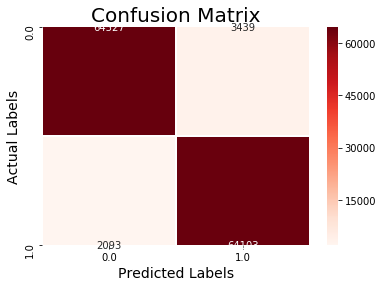

In [52]:
cm = confusion_matrix(y_test, y_pred)

cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Reds', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

# Classification Report

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     67966
         1.0       0.95      0.97      0.96     66196

    accuracy                           0.96    134162
   macro avg       0.96      0.96      0.96    134162
weighted avg       0.96      0.96      0.96    134162



# Results

The accuracy of our model on training dataset is 96.15% and on testing dataset is 95.86%. Precision Recall and F1 score can be infered by classification report.

---------------------------------------------------------------------------------------------------------------------------